    
**Exploratory data analysis of the Titanic dataset**

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

![](NYT_titanic.png)

source: [wikipedia.org](https://en.wikipedia.org/wiki/RMS_Titanic)


### Outline and goals

In this project, I will explore the titanic dataset using exploratory data analysis. The goals of this exercise are:
- conduct exploratory data analysis using python's seaborn library
- make a structured analysis (of a subset) of a given dataset
- contrast subgroups of data
- find patterns and outliers in data


**Load the data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Description of the titanic dataset:
survived - Survival (0 = No; 1 = Yes)<br>
plass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
sex - Gender<br>
age - Age<br>
sibsp - Number of Siblings/Spouses Aboard<br>
parch - Number of Parents/Children Aboard<br>
fare - Passenger fare<br>
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
class - Class as string<br>
who - Type of person (child, man, woman)<br>
adult_male - Passenger is an adult male<br>
deck - Deck of passenger's accomodation<br>
embark_town - Port of Embarkation as string<br>
alive - Boolean<br>
alone - Person travelled alone<br>

- Data Analysis

In [2]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [3]:
titanic.describe(include = 'all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
titanic.isnull().count()

survived       891
pclass         891
sex            891
age            891
sibsp          891
parch          891
fare           891
embarked       891
class          891
who            891
adult_male     891
deck           891
embark_town    891
alive          891
alone          891
dtype: int64

In [5]:
Decks = pd.Series(titanic['deck'])
Decks_count = Decks.value_counts()
Decks_count

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

Not all passengers were assigned decks

- Data Visualization

In [6]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

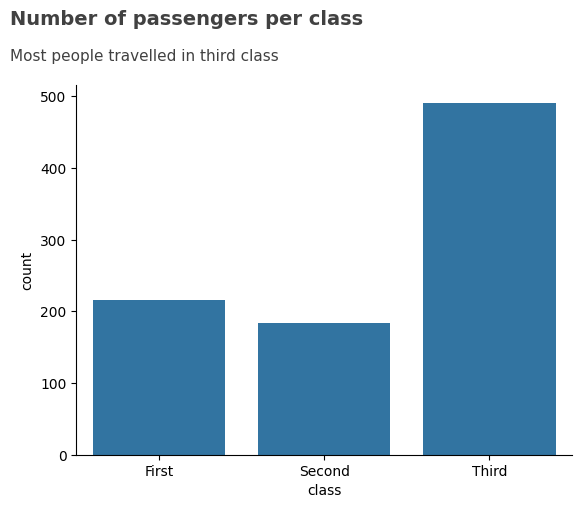

In [7]:
ax = sns.countplot(x="class", data=titanic)
ax.text(x=-.9, y=600, s="Number of passengers per class", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=-.9, y=550, s="Most people travelled in third class", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

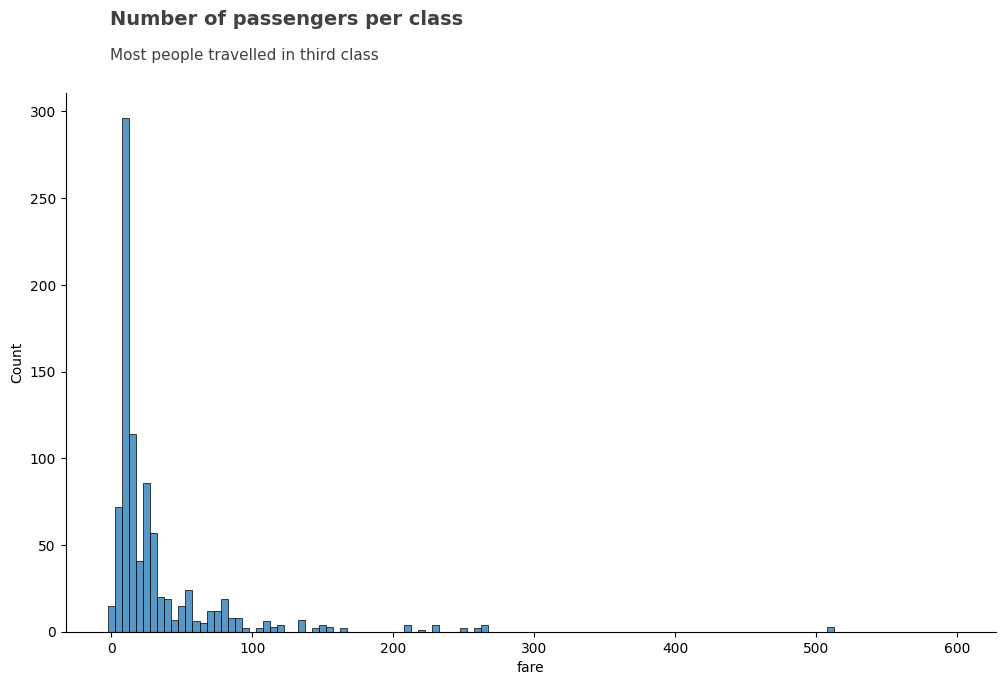

In [8]:
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.histplot(x="fare", data=titanic, bins = np.arange(-2.5,600, 5))
ax.text(x=-.9, y=350, s="Number of passengers per class", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=-.9, y=330, s="Most people travelled in third class", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

In [9]:
price = titanic['fare']
print('Total number of unique Prices')
print(price.value_counts().nunique())  

Total number of unique Prices
20


In [10]:
print('Breakdown of Prices')
print(price.value_counts())

Breakdown of Prices
fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64


In [11]:
print('The various columns of the Dataset_ Features')
print(list(titanic))

The various columns of the Dataset_ Features
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


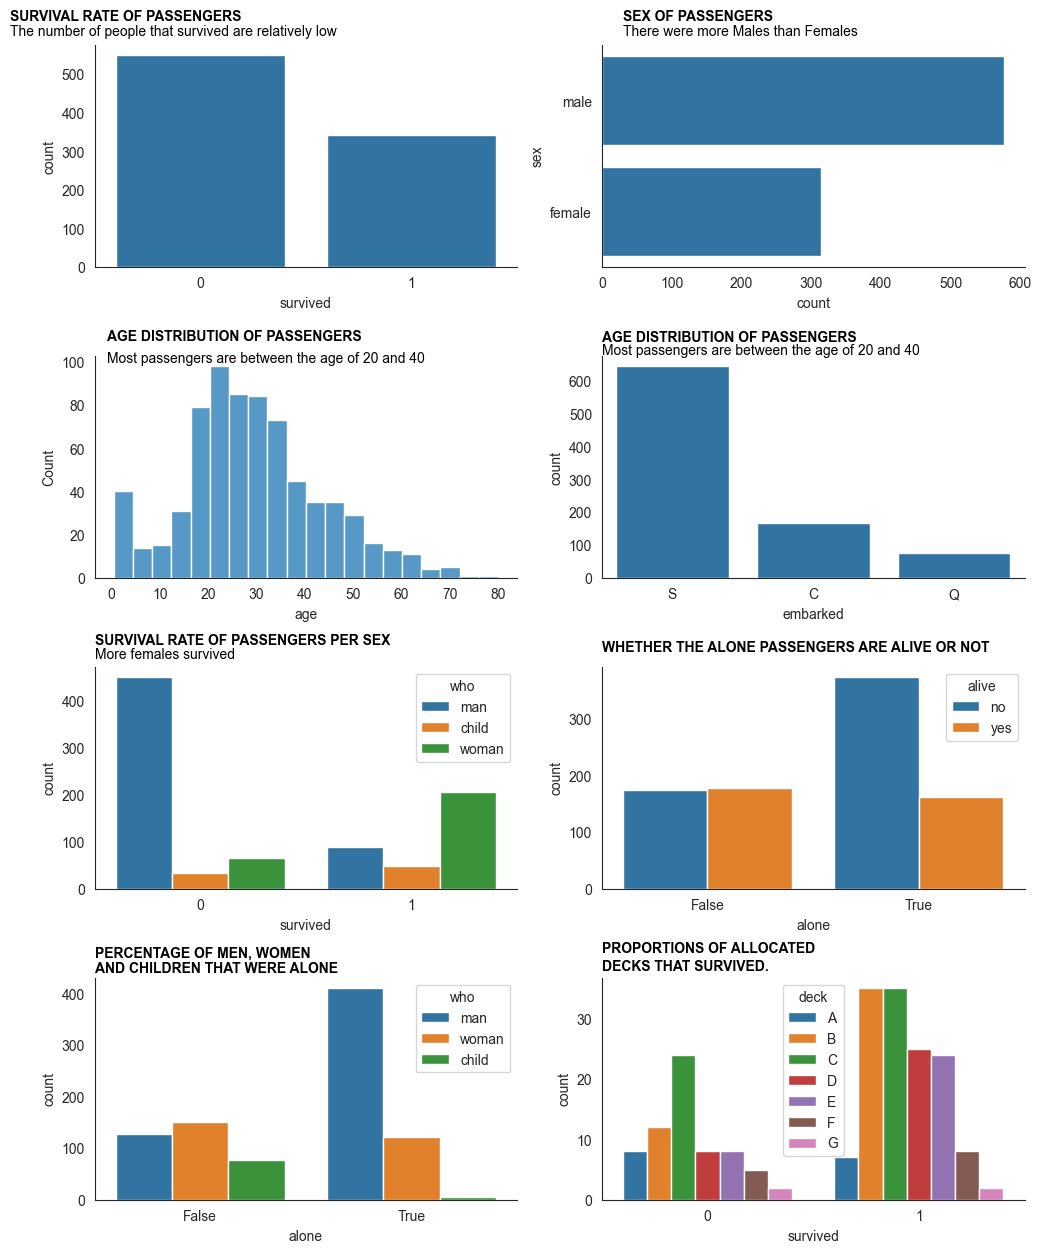

In [12]:
sns.set_style('white') 
fig, ax = plt.subplots(4,2, figsize=(12, 15))
plt.subplots_adjust(hspace = 0.4)

sns.countplot(x = 'survived', data = titanic, ax = ax[0][0])
ax[0][0].text(x = -0.9, y = 640, s = 'SURVIVAL RATE OF PASSENGERS', fontsize=10, fontweight='semibold', color='black')
ax[0][0].text(x = -0.9, y = 600, s = 'The number of people that survived are relatively low', fontsize=10, fontweight='normal', color='black')

sns.countplot(y ='sex', data = titanic, ax = ax[0][1])
ax[0][0].text(x = 2, y = 640, s = 'SEX OF PASSENGERS', fontsize=10, fontweight='semibold', color='black')
ax[0][0].text(x = 2, y = 600, s = 'There were more Males than Females', fontsize=10, fontweight='normal', color='black')

sns.histplot(titanic['age'], ax = ax[1][0])
ax[1][0].text(x = -0.9, y = 110, s = 'AGE DISTRIBUTION OF PASSENGERS', fontsize = 10, fontweight = 'semibold', color = 'black')
ax[1][0].text(x = -0.9, y = 100, s = 'Most passengers are between the age of 20 and 40', fontsize=10, fontweight='normal', color='black')

sns.countplot(x= 'embarked', data = titanic, ax = ax[1][1])
ax[1][1].text(x = -0.5, y = 720, s = 'AGE DISTRIBUTION OF PASSENGERS', fontsize = 10, fontweight = 'semibold', color = 'black')
ax[1][1].text(x = -0.5, y = 680, s = 'Most passengers are between the age of 20 and 40', fontsize=10, fontweight='normal', color='black')

sns.countplot(x = 'survived', data = titanic, hue = 'who', ax = ax[2][0])
ax[2][0].text(x = -0.5, y = 520, s = 'SURVIVAL RATE OF PASSENGERS PER SEX', fontsize=10, fontweight='semibold', color='black')
ax[2][0].text(x = -0.5, y = 490, s = 'More females survived ', fontsize=10, fontweight='normal', color='black')

sns.countplot(x = 'alone', data = titanic, hue = 'alive', ax = ax[2][1])
ax[2][1].text(x = -0.5, y = 420, s = 'WHETHER THE ALONE PASSENGERS ARE ALIVE OR NOT', fontsize=10, fontweight='semibold', color='black')
ax[2][1].text(x = -0.5, y = 410, s = '', fontsize=10, fontweight='normal', color='black')

sns.countplot(x = 'alone', data = titanic, hue = 'who', ax = ax[3][0])
ax[3][0].text(x = -0.5, y = 470, s = 'PERCENTAGE OF MEN, WOMEN', fontsize=10, fontweight='semibold', color='black')
ax[3][0].text(x = -0.5, y = 440, s = 'AND CHILDREN THAT WERE ALONE', fontsize=10, fontweight='semibold', color='black')


sns.countplot(x = 'survived', data = titanic, hue = 'deck', ax = ax[3][1])
ax[3][1].text(x = -0.5, y = 41, s = 'PROPORTIONS OF ALLOCATED', fontsize=10, fontweight='semibold', color='black')
ax[3][1].text(x = -0.5, y = 38, s = 'DECKS THAT SURVIVED.', fontsize=10, fontweight='semibold', color='black')

sns.despine()

- Women had the highest chance of survival

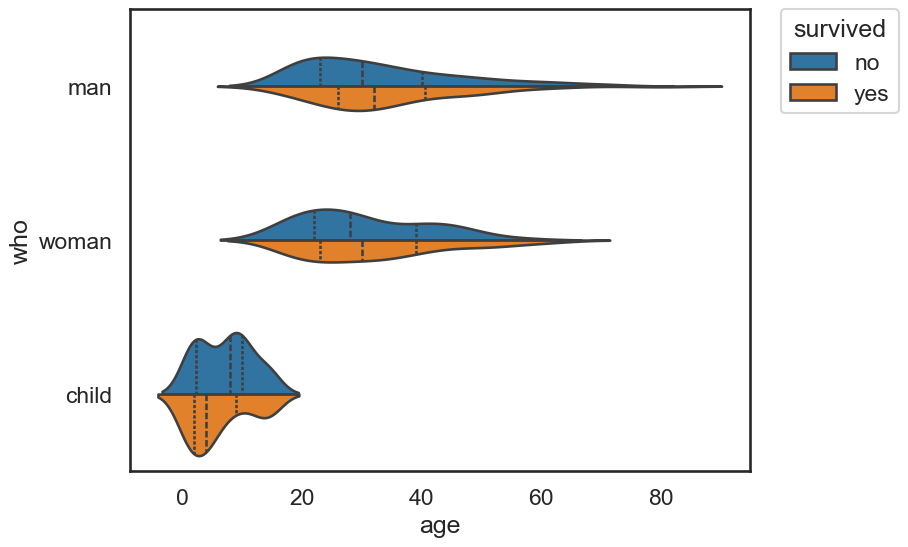

In [13]:
sns.set_context('talk') # Scale elements by 1.3
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.violinplot( y = 'who', x = 'age', hue = 'alive', data = titanic, split = True, inner = 'quartile')

plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0, title = 'survived')
plt.show()

> Men who are older had a better chance of survival than young men.  
  Women who were between the ages od 20 and 40 had a better a fifty fifty chance of survival and death.  
  Children who were younger relatively had a better chance of survival as compared to children who were a bit older. 

- Computing the survival rate for all passengers.

In [14]:
titanic['alive'].value_counts() /len(titanic)

alive
no     0.616162
yes    0.383838
Name: count, dtype: float64

We see that the total survival rate was 38%.

- Checking the survival rate for passengers from all decks. Including those that weren't assigned Decks  
And consequently plotting them

In [15]:
titanic['deck_all'] = titanic['deck'].cat.add_categories("None").fillna("None")
titanic['deck_all'].value_counts()/ len(titanic)

deck_all
None    0.772166
C       0.066218
B       0.052750
D       0.037037
E       0.035915
A       0.016835
F       0.014590
G       0.004489
Name: count, dtype: float64

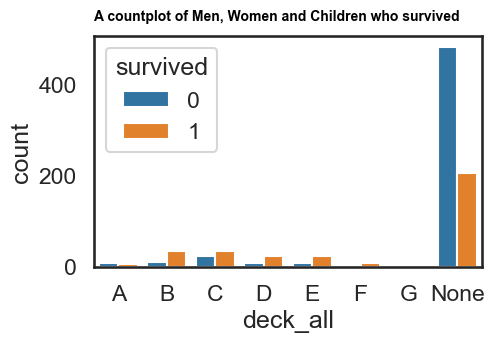

In [16]:
plt.figure(figsize = (5,3)) 
ax = sns.countplot(x ='deck_all', hue = "survived", data = titanic)
ax.text(x = -0.5, y = 540, s = 'A countplot of Men, Women and Children who survived', fontsize=10, fontweight='bold', color='black')
plt.show()

- Checking whether tickets were equally priced for all passengers in the respective classes(Both Young and Old)  
  And whether or not only old people were in first class


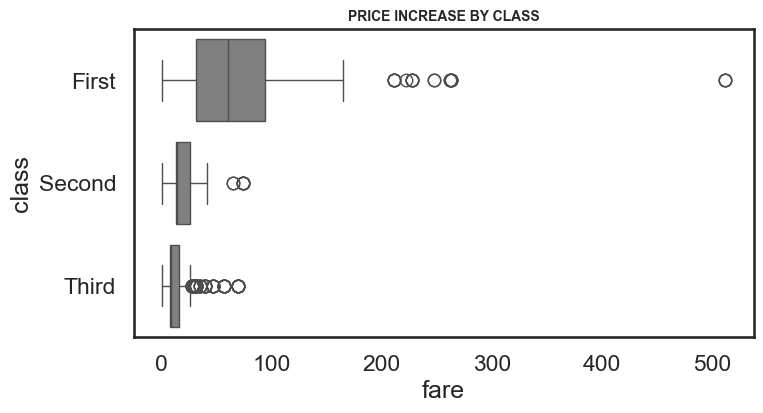

In [17]:
plt.figure(figsize = (8, 4))
ax = sns.boxplot(x = 'fare', y = 'class', data = titanic.dropna(subset = ['fare']), color = 'gray')
ax.set_title('PRICE INCREASE BY CLASS', fontsize = 10, fontweight = 'semibold')
plt.show()

>The tickets gets more expensive with increasing class.  
The median values for the three classes are significantly different and even the IQR do not overlap for the first and second class. However, we also see that first class was available to some even for free.

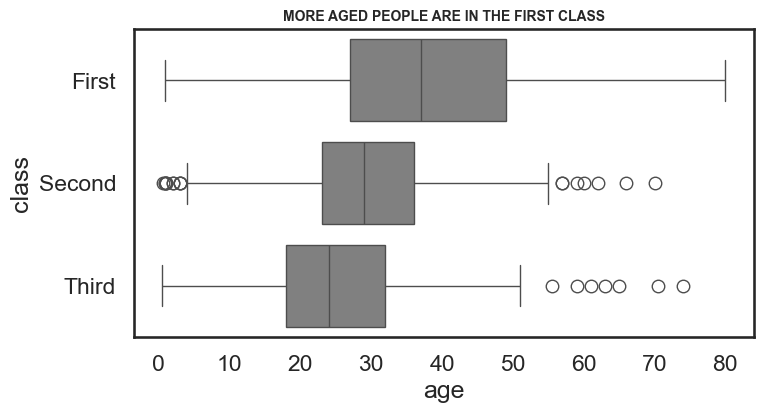

In [18]:
plt.figure(figsize = (8, 4))
ax = sns.boxplot(x = 'age', y = 'class', data = titanic.dropna(subset = ['fare']), color = 'gray')
ax.set_title('MORE AGED PEOPLE ARE IN THE FIRST CLASS', fontsize = 10, fontweight = 'semibold')
plt.show()

>Figure two depicts the age of adult passengers in each class. Here we see that indeed median and IQR increases which means that people in First class were commonly older than those in second and third.  
The majority of adults in first class was aged 30-50 which in the early 20th century was senior age.

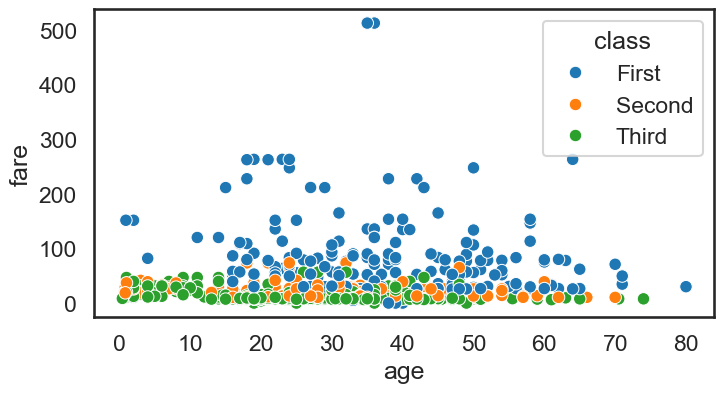

In [19]:
plt.figure(figsize = (8, 4))
sns.scatterplot(y= 'fare', x = 'age',  data = titanic, hue = 'class')
plt.show()

> The above figure depicts the distribution of age and fare in first class. We see that most people in this group are age 18-60 and payed between 25 and 100 pounds. This price is significantly higher than what passengers in second and third class paid. There is a small group of young adults (18-25) in first class that did afford this price.

In general it is true that first class passengers paid significantly more than passengers in the other classes  
and that passengers in first class are older than passengers in the other classes. However, the young adults in the first class paid prices similar to the ones of older passengers in first class.  
So choosing first class appears to be a question of being able to afford it or spend that much money on the journey.
